# Import libraries

In [ ]:
from google.colab import drive
#drive.mount('/content/gdrive/')
drive.mount("/content/gdrive/", force_remount=True)

In [ ]:
%cd "/content/gdrive/My Drive/Colab Notebooks/LADMM_Net_Pytorch"
%ls

In [1]:
import os
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
import scipy.io as sio

from models.LadmmNet import LADMMcsimageNet
import torch
import torch.nn as nn

gpu_list = '0'
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = gpu_list
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Utility functions

In [2]:
def imread_CS_py(Iorg):
    block_size = 33
    [row, col] = Iorg.shape
    row_pad = block_size-np.mod(row,block_size)
    col_pad = block_size-np.mod(col,block_size)
    Ipad = np.concatenate((Iorg, np.zeros([row, col_pad])), axis=1)
    Ipad = np.concatenate((Ipad, np.zeros([row_pad, col+col_pad])), axis=0)
    [row_new, col_new] = Ipad.shape

    return [Iorg, row, col, Ipad, row_new, col_new]

def img2col_py(Ipad, block_size):
    [row, col] = Ipad.shape
    row_block = row/block_size
    col_block = col/block_size
    block_num = int(row_block*col_block)
    img_col = np.zeros([block_size**2, block_num])
    count = 0
    for x in range(0, row-block_size+1, block_size):
        for y in range(0, col-block_size+1, block_size):
            img_col[:, count] = Ipad[x:x+block_size, y:y+block_size].reshape([-1])
            count = count + 1
    return img_col

def col2im_CS_py(X_col, row, col, row_new, col_new):
    block_size = 33
    X0_rec = np.zeros([row_new, col_new])
    count = 0
    for x in range(0, row_new-block_size+1, block_size):
        for y in range(0, col_new-block_size+1, block_size):
            X0_rec[x:x+block_size, y:y+block_size] = X_col[:, count].reshape([block_size, block_size])
            count = count + 1
    X_rec = X0_rec[:row, :col]
    return X_rec

# Measurement matrices

In [3]:
fname1       = 'H.mat'
data_path    = os.path.join(os.getcwd(),'data/GrayscaleImages/Clean_measurements_25')
H            = sio.loadmat(os.path.join(data_path, fname1))['H']
H            = torch.from_numpy(H).type(torch.FloatTensor)
H            = H.to(device)

# LADMM parameters

In [4]:
M = 256
N = 256
L = 1

layer_num               = 16 
learning_rate           = 0.001
epochs                  = 513
num_training_samples    = 80
num_samples             = 80
batch_size              = 1
num_processed_images    = 1
compression_rate        = 25

model     = LADMMcsimageNet(layer_num)
model     = nn.DataParallel(model)
model     = model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

sample_path     = os.path.join(os.getcwd(),'data/GrayscaleImages/Clean_measurements_25')
data_path       = os.path.join(os.getcwd(),'data/GrayscaleImages')
prmt_path       = os.path.join(os.getcwd(),'train_parameters/GrayscaleImages/LADMM_Net_layer_%d_ratio_%d'%(layer_num, compression_rate))
model_dir = "./train_parameters/GrayscaleImages/LADMM_Net_layer_%d_ratio_%d" % (layer_num, compression_rate)

# Training stage

0
Mean Epoch PSNR = 12.10 dB
1
Mean Epoch PSNR = 19.26 dB
2
Mean Epoch PSNR = 21.64 dB
3
Mean Epoch PSNR = 22.36 dB
4
Mean Epoch PSNR = 23.20 dB
5
Mean Epoch PSNR = 22.70 dB
6
Mean Epoch PSNR = 23.88 dB
7
Mean Epoch PSNR = 24.33 dB
8
Mean Epoch PSNR = 24.75 dB
9
Mean Epoch PSNR = 24.71 dB
10
Mean Epoch PSNR = 25.38 dB
11
Mean Epoch PSNR = 25.27 dB
12
Mean Epoch PSNR = 25.81 dB
13
Mean Epoch PSNR = 25.97 dB
14
Mean Epoch PSNR = 25.93 dB
15
Mean Epoch PSNR = 26.31 dB
16
Mean Epoch PSNR = 26.41 dB
17
Mean Epoch PSNR = 26.53 dB
18
Mean Epoch PSNR = 26.62 dB
19
Mean Epoch PSNR = 26.73 dB
20
Mean Epoch PSNR = 26.80 dB
21
Mean Epoch PSNR = 26.85 dB
22
Mean Epoch PSNR = 26.96 dB
23
Mean Epoch PSNR = 26.99 dB
24
Mean Epoch PSNR = 27.05 dB
25
Mean Epoch PSNR = 27.19 dB
26
Mean Epoch PSNR = 27.16 dB
27
Mean Epoch PSNR = 27.23 dB
28
Mean Epoch PSNR = 27.31 dB
29
Mean Epoch PSNR = 27.35 dB
30
Mean Epoch PSNR = 27.39 dB
31
Mean Epoch PSNR = 27.39 dB
32
Mean Epoch PSNR = 27.45 dB
33
Mean Epoch PSNR =

Mean Epoch PSNR = 30.17 dB
269
Mean Epoch PSNR = 30.25 dB
270
Mean Epoch PSNR = 30.32 dB
271
Mean Epoch PSNR = 30.32 dB
272
Mean Epoch PSNR = 30.34 dB
273
Mean Epoch PSNR = 30.31 dB
274
Mean Epoch PSNR = 30.29 dB
275
Mean Epoch PSNR = 30.23 dB
276
Mean Epoch PSNR = 30.33 dB
277
Mean Epoch PSNR = 30.33 dB
278
Mean Epoch PSNR = 30.27 dB
279
Mean Epoch PSNR = 30.27 dB
280
Mean Epoch PSNR = 30.21 dB
281
Mean Epoch PSNR = 30.32 dB
282
Mean Epoch PSNR = 30.32 dB
283
Mean Epoch PSNR = 29.93 dB
284
Mean Epoch PSNR = 29.87 dB
285
Mean Epoch PSNR = 30.21 dB
286
Mean Epoch PSNR = 30.16 dB
287
Mean Epoch PSNR = 30.07 dB
288
Mean Epoch PSNR = 30.12 dB
289
Mean Epoch PSNR = 30.16 dB
290
Mean Epoch PSNR = 30.27 dB
291
Mean Epoch PSNR = 30.28 dB
292
Mean Epoch PSNR = 30.31 dB
293
Mean Epoch PSNR = 30.34 dB
294
Mean Epoch PSNR = 30.32 dB
295
Mean Epoch PSNR = 30.32 dB
296
Mean Epoch PSNR = 30.23 dB
297
Mean Epoch PSNR = 30.29 dB
298
Mean Epoch PSNR = 30.34 dB
299
Mean Epoch PSNR = 30.25 dB
300
Mean Epo

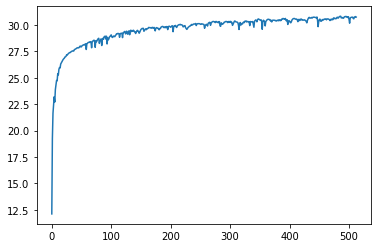

In [5]:
batch_inner_loops = batch_size // num_processed_images
psnr = np.zeros(epochs)
# Training loop
for epoch_i in range(0, epochs):
    print(epoch_i)
    batch_iter  = num_training_samples // batch_size
    psnr_b      = np.zeros(batch_iter)
    for data in range(0,batch_iter):
        for j in range(0,batch_inner_loops):
            for bs in range(0, num_processed_images):
                indice      = data*num_processed_images + bs
                fpointer    = indice + 1
                fsamples_ms = 'samples_%03d.mat'%(fpointer)
                y           = sio.loadmat(os.path.join(sample_path, fsamples_ms))['y']
            
            # Preparing input data
            y       = torch.from_numpy(y).type(torch.FloatTensor)
            y       = y.to(device)
            HTy     = torch.mm(torch.t(H), y)
            HTy     = torch.t(HTy)
            HTy     = HTy.to(device)
            del y
       
            [x_output, loss_layers_sym] = model(H, HTy, 33, 33)

            loss_constraint = torch.mean(torch.pow(loss_layers_sym[0], 2))
            for k in range(layer_num-1):
                loss_constraint += float(torch.mean(torch.pow(loss_layers_sym[k+1], 2)))
            
            for bs in range(0, num_processed_images):
                indice    = data*num_processed_images + bs
                fpointer  = indice + 1
                fimage    = 'gray_%03d.mat'%(fpointer)
                I         = sio.loadmat(os.path.join(data_path, fimage))['I']

            [Io, row, col, Ipad, row_new, col_new] = imread_CS_py(I)
            x   = img2col_py(Ipad, 33) / 255.0       
            x   = torch.from_numpy(x).type(torch.FloatTensor)
            x   = torch.t(x)
            x   = x.to(device)
            
            loss_discrepancy  = torch.mean(torch.pow(x_output - x, 2))           
            
            del x_output, I, Io, Ipad

        loss_all = loss_discrepancy + torch.mul(0.01, loss_constraint)
        psnr_batch = torch.mul(10, torch.log10(torch.div(1.0, loss_discrepancy))) 
        psnr_b[data] = psnr_batch; 
        
        optimizer.zero_grad()
        loss_all.backward()
        optimizer.step()

    psnr[epoch_i] = np.mean(psnr_b)
    sio.savemat('csi_psnr_vs_epochs_layer_%d_ratio_%d.mat'%(layer_num, compression_rate),{"psnr_vs_epochs":psnr})    
    print('Mean Epoch PSNR = %.2f dB'%(psnr[epoch_i]))
    if epoch_i % 32 == 0:
        torch.save(model.state_dict(), "./%s/net_params_%d.pkl" % (model_dir, epoch_i))
        

plt.figure()
plt.plot(psnr)